## Linear regresion using normal equation and gradient descent

In [1]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
# to make this notebook's output stable across runs
import numpy as np
np.random.seed(42)

## the ideal  model is y=4+3x

In [3]:
X=2*np.random.rand(100,1)
y=4 + 3*X + np.random.randn(100,1)
print(X.shape)
print(y.shape)

(100, 1)
(100, 1)


In [4]:
X.ndim

2

In [5]:
y.ndim

2

In [6]:
type(X)

numpy.ndarray

In [7]:
type(y)

numpy.ndarray

### X , y : column vector

In [8]:
X[:5]

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728]])

In [9]:
y[:5]

array([[6.33428778],
       [9.40527849],
       [8.48372443],
       [5.60438199],
       [4.71643995]])

In [10]:
data=np.hstack((X,y))

In [11]:
print(type(data))

<class 'numpy.ndarray'>


In [12]:
data.ndim

2

In [13]:
print(data[:5])

[[0.74908024 6.33428778]
 [1.90142861 9.40527849]
 [1.46398788 8.48372443]
 [1.19731697 5.60438199]
 [0.31203728 4.71643995]]


## Let's see the input versus output

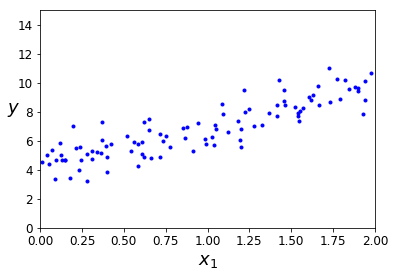

In [14]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

### using stochastic gradient 

In [15]:
print(data[:5])

[[0.74908024 6.33428778]
 [1.90142861 9.40527849]
 [1.46398788 8.48372443]
 [1.19731697 5.60438199]
 [0.31203728 4.71643995]]


In [26]:
n_samples=np.size(data,0)

In [25]:
np.size(data,1)

2

###  Step 1: create placeholders for X (birth rate) and Y (life expectancy)

In [16]:
import tensorflow as tf
Xi = tf.placeholder(tf.float32, name='X')
Yo = tf.placeholder(tf.float32, name='Y')

### Step 2: create weight and bias, initialized to 0

In [17]:
w = tf.get_variable('weights', initializer=tf.constant(0.0))
b = tf.get_variable('bias', initializer=tf.constant(0.0))

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
Y_predicted = w * Xi + b 

In [19]:
loss = tf.square(Yo - Y_predicted, name='loss')

In [21]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [29]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) 
    #  train the model for 100 epochs
    for i in range(100):
        total_loss = 0
        for xq,yq in data:
            print(xq,yq)
            _, l = sess.run([optimizer, loss], feed_dict={Xi: xq, Yo:yq})
            total_loss += l
        print('Epoch {0}: {1}'.format(i, total_loss/n_samples))
    w_out, b_out = sess.run([w, b]) 

0.749080237694725 6.334287781322345
1.9014286128198323 9.40527848799363
1.4639878836228102 8.483724427403931
1.1973169683940732 5.604381990581327
0.31203728088487304 4.716439954817107
0.3119890406724053 5.293079693528962
0.11616722433639892 5.826395717750713
1.7323522915498704 8.678786656375964
1.2022300234864176 6.798196467566066
1.416145155592091 7.746678423191737
0.041168988591604894 5.038909083476889
1.9398197043239886 10.14821022263165
1.6648852816008435 8.464895641035492
0.4246782213565523 5.787302097183012
0.36364993441420124 5.188027352590644
0.36680901970686763 6.069072049653492
0.6084844859190754 5.123400363879874
1.0495128632644757 6.820876443195659
0.8638900372842315 6.199561958720537
0.5824582803960838 4.283859893056133
1.223705789444759 7.9672376453988525
0.27898772130408367 5.09801843609214
0.5842892970704363 5.757981347853771
0.7327236865873834 5.963583926387003
0.9121399684340719 5.321049163251801
1.5703519227860272 8.290410445592721
0.39934756431671947 4.8553281764233

1.8186408041575641 10.207855445159465
0.5175599632000338 6.343711836643148
1.325044568707964 7.065746251329152
0.6234221521788219 7.273060767472565
1.0401360423556216 5.718557064274584
1.0934205586865593 7.867118769859948
0.3697089110510541 7.299582358963141
1.9391692555291171 8.826971441456662
1.550265646722229 8.084499210563916
1.8789978831283782 9.736645014472776
1.7896547008552977 8.865488448449694
1.1957999576221703 6.036736441800379
1.8437484700462337 9.59980838494473
0.176985004103839 3.468651298585412
0.3919657248382904 5.649489605150053
0.09045457782107613 3.3519394992294256
0.6506606615265287 7.501916389597126
0.777354579378964 5.548810445800655
0.5426980635477918 5.3060326744377
1.6574750183038587 9.785942272281245
0.7135066533871786 4.9096556437275805
0.5618690193747615 5.913066992728415
1.085392166316497 8.563319253231919
0.2818484499495253 3.2380621152873488
1.6043939615080793 8.997815743056542
0.14910128735954165 4.707186656327049
1.9737738732010346 10.703144491380414
1.

0.05083825348819038 4.429205559794591
0.2157828539866089 5.474531810995851
Epoch 6: 1.2203909572157636
0.749080237694725 6.334287781322345
1.9014286128198323 9.40527848799363
1.4639878836228102 8.483724427403931
1.1973169683940732 5.604381990581327
0.31203728088487304 4.716439954817107
0.3119890406724053 5.293079693528962
0.11616722433639892 5.826395717750713
1.7323522915498704 8.678786656375964
1.2022300234864176 6.798196467566066
1.416145155592091 7.746678423191737
0.041168988591604894 5.038909083476889
1.9398197043239886 10.14821022263165
1.6648852816008435 8.464895641035492
0.4246782213565523 5.787302097183012
0.36364993441420124 5.188027352590644
0.36680901970686763 6.069072049653492
0.6084844859190754 5.123400363879874
1.0495128632644757 6.820876443195659
0.8638900372842315 6.199561958720537
0.5824582803960838 4.283859893056133
1.223705789444759 7.9672376453988525
0.27898772130408367 5.09801843609214
0.5842892970704363 5.757981347853771
0.7327236865873834 5.963583926387003
0.9121

1.1957999576221703 6.036736441800379
1.8437484700462337 9.59980838494473
0.176985004103839 3.468651298585412
0.3919657248382904 5.649489605150053
0.09045457782107613 3.3519394992294256
0.6506606615265287 7.501916389597126
0.777354579378964 5.548810445800655
0.5426980635477918 5.3060326744377
1.6574750183038587 9.785942272281245
0.7135066533871786 4.9096556437275805
0.5618690193747615 5.913066992728415
1.085392166316497 8.563319253231919
0.2818484499495253 3.2380621152873488
1.6043939615080793 8.997815743056542
0.14910128735954165 4.707186656327049
1.9737738732010346 10.703144491380414
1.5444895385933148 7.396517904901863
0.3974313630683448 3.8718374761207586
0.011044234247204798 4.555074268358512
1.6309228569096683 9.18975324396219
1.4137146876952342 8.491636913431579
1.4580143360819746 8.720491217742898
1.5425406933718915 7.947597358537184
0.14808930346818072 4.676521607565546
0.7169314570885452 6.443866844564317
0.23173811905025943 3.9808629391244104
1.726206851751187 11.044395066398

1.4639878836228102 8.483724427403931
1.1973169683940732 5.604381990581327
0.31203728088487304 4.716439954817107
0.3119890406724053 5.293079693528962
0.11616722433639892 5.826395717750713
1.7323522915498704 8.678786656375964
1.2022300234864176 6.798196467566066
1.416145155592091 7.746678423191737
0.041168988591604894 5.038909083476889
1.9398197043239886 10.14821022263165
1.6648852816008435 8.464895641035492
0.4246782213565523 5.787302097183012
0.36364993441420124 5.188027352590644
0.36680901970686763 6.069072049653492
0.6084844859190754 5.123400363879874
1.0495128632644757 6.820876443195659
0.8638900372842315 6.199561958720537
0.5824582803960838 4.283859893056133
1.223705789444759 7.9672376453988525
0.27898772130408367 5.09801843609214
0.5842892970704363 5.757981347853771
0.7327236865873834 5.963583926387003
0.9121399684340719 5.321049163251801
1.5703519227860272 8.290410445592721
0.39934756431671947 4.855328176423389
1.0284688768272232 6.28312936126005
1.184829137724085 7.3932017015062

0.09045457782107613 3.3519394992294256
0.6506606615265287 7.501916389597126
0.777354579378964 5.548810445800655
0.5426980635477918 5.3060326744377
1.6574750183038587 9.785942272281245
0.7135066533871786 4.9096556437275805
0.5618690193747615 5.913066992728415
1.085392166316497 8.563319253231919
0.2818484499495253 3.2380621152873488
1.6043939615080793 8.997815743056542
0.14910128735954165 4.707186656327049
1.9737738732010346 10.703144491380414
1.5444895385933148 7.396517904901863
0.3974313630683448 3.8718374761207586
0.011044234247204798 4.555074268358512
1.6309228569096683 9.18975324396219
1.4137146876952342 8.491636913431579
1.4580143360819746 8.720491217742898
1.5425406933718915 7.947597358537184
0.14808930346818072 4.676521607565546
0.7169314570885452 6.443866844564317
0.23173811905025943 3.9808629391244104
1.726206851751187 11.044395066398318
1.2465962536551158 8.213621681877136
0.6617960497052984 4.794084651913247
0.12711670057204727 5.037903710349971
0.6219646434313244 4.891212260

1.5215700972337949 8.319322175698515
1.1225543951389925 6.613927021059488
1.541934359909122 7.736288650101843
0.9875911927287815 6.146963293220907
1.0454656587639881 7.05929526687786
0.8550820367170993 6.906398084967942
0.05083825348819038 4.429205559794591
0.2157828539866089 5.474531810995851
Epoch 20: 0.8845332973677636
0.749080237694725 6.334287781322345
1.9014286128198323 9.40527848799363
1.4639878836228102 8.483724427403931
1.1973169683940732 5.604381990581327
0.31203728088487304 4.716439954817107
0.3119890406724053 5.293079693528962
0.11616722433639892 5.826395717750713
1.7323522915498704 8.678786656375964
1.2022300234864176 6.798196467566066
1.416145155592091 7.746678423191737
0.041168988591604894 5.038909083476889
1.9398197043239886 10.14821022263165
1.6648852816008435 8.464895641035492
0.4246782213565523 5.787302097183012
0.36364993441420124 5.188027352590644
0.36680901970686763 6.069072049653492
0.6084844859190754 5.123400363879874
1.0495128632644757 6.820876443195659
0.86389

0.9903538202225404 5.802383423048089
0.06877704223043679 5.349153941206331
1.8186408041575641 10.207855445159465
0.5175599632000338 6.343711836643148
1.325044568707964 7.065746251329152
0.6234221521788219 7.273060767472565
1.0401360423556216 5.718557064274584
1.0934205586865593 7.867118769859948
0.3697089110510541 7.299582358963141
1.9391692555291171 8.826971441456662
1.550265646722229 8.084499210563916
1.8789978831283782 9.736645014472776
1.7896547008552977 8.865488448449694
1.1957999576221703 6.036736441800379
1.8437484700462337 9.59980838494473
0.176985004103839 3.468651298585412
0.3919657248382904 5.649489605150053
0.09045457782107613 3.3519394992294256
0.6506606615265287 7.501916389597126
0.777354579378964 5.548810445800655
0.5426980635477918 5.3060326744377
1.6574750183038587 9.785942272281245
0.7135066533871786 4.9096556437275805
0.5618690193747615 5.913066992728415
1.085392166316497 8.563319253231919
0.2818484499495253 3.2380621152873488
1.6043939615080793 8.997815743056542
0.1

0.6234221521788219 7.273060767472565
1.0401360423556216 5.718557064274584
1.0934205586865593 7.867118769859948
0.3697089110510541 7.299582358963141
1.9391692555291171 8.826971441456662
1.550265646722229 8.084499210563916
1.8789978831283782 9.736645014472776
1.7896547008552977 8.865488448449694
1.1957999576221703 6.036736441800379
1.8437484700462337 9.59980838494473
0.176985004103839 3.468651298585412
0.3919657248382904 5.649489605150053
0.09045457782107613 3.3519394992294256
0.6506606615265287 7.501916389597126
0.777354579378964 5.548810445800655
0.5426980635477918 5.3060326744377
1.6574750183038587 9.785942272281245
0.7135066533871786 4.9096556437275805
0.5618690193747615 5.913066992728415
1.085392166316497 8.563319253231919
0.2818484499495253 3.2380621152873488
1.6043939615080793 8.997815743056542
0.14910128735954165 4.707186656327049
1.9737738732010346 10.703144491380414
1.5444895385933148 7.396517904901863
0.3974313630683448 3.8718374761207586
0.011044234247204798 4.555074268358512

0.09045457782107613 3.3519394992294256
0.6506606615265287 7.501916389597126
0.777354579378964 5.548810445800655
0.5426980635477918 5.3060326744377
1.6574750183038587 9.785942272281245
0.7135066533871786 4.9096556437275805
0.5618690193747615 5.913066992728415
1.085392166316497 8.563319253231919
0.2818484499495253 3.2380621152873488
1.6043939615080793 8.997815743056542
0.14910128735954165 4.707186656327049
1.9737738732010346 10.703144491380414
1.5444895385933148 7.396517904901863
0.3974313630683448 3.8718374761207586
0.011044234247204798 4.555074268358512
1.6309228569096683 9.18975324396219
1.4137146876952342 8.491636913431579
1.4580143360819746 8.720491217742898
1.5425406933718915 7.947597358537184
0.14808930346818072 4.676521607565546
0.7169314570885452 6.443866844564317
0.23173811905025943 3.9808629391244104
1.726206851751187 11.044395066398318
1.2465962536551158 8.213621681877136
0.6617960497052984 4.794084651913247
0.12711670057204727 5.037903710349971
0.6219646434313244 4.891212260

1.4137146876952342 8.491636913431579
1.4580143360819746 8.720491217742898
1.5425406933718915 7.947597358537184
0.14808930346818072 4.676521607565546
0.7169314570885452 6.443866844564317
0.23173811905025943 3.9808629391244104
1.726206851751187 11.044395066398318
1.2465962536551158 8.213621681877136
0.6617960497052984 4.794084651913247
0.12711670057204727 5.037903710349971
0.6219646434313244 4.891212260066652
0.6503666440534941 6.738184535902934
1.4592123566761281 9.536232649035789
1.2751149427104262 7.004662509779568
1.774425485152653 10.286652584702281
0.9444298503238986 7.2460704779081935
0.2391884918766034 5.5396256356243
1.42648957444599 10.176261705991918
1.5215700972337949 8.319322175698515
1.1225543951389925 6.613927021059488
1.541934359909122 7.736288650101843
0.9875911927287815 6.146963293220907
1.0454656587639881 7.05929526687786
0.8550820367170993 6.906398084967942
0.05083825348819038 4.429205559794591
0.2157828539866089 5.474531810995851
Epoch 33: 0.840942417230981
0.7490802

0.041168988591604894 5.038909083476889
1.9398197043239886 10.14821022263165
1.6648852816008435 8.464895641035492
0.4246782213565523 5.787302097183012
0.36364993441420124 5.188027352590644
0.36680901970686763 6.069072049653492
0.6084844859190754 5.123400363879874
1.0495128632644757 6.820876443195659
0.8638900372842315 6.199561958720537
0.5824582803960838 4.283859893056133
1.223705789444759 7.9672376453988525
0.27898772130408367 5.09801843609214
0.5842892970704363 5.757981347853771
0.7327236865873834 5.963583926387003
0.9121399684340719 5.321049163251801
1.5703519227860272 8.290410445592721
0.39934756431671947 4.855328176423389
1.0284688768272232 6.28312936126005
1.184829137724085 7.3932017015062454
0.09290082543999545 4.682753333134524
1.2150897038028767 9.53145501261916
0.34104824737458306 5.197722554955589
0.13010318597055903 4.647859948634442
1.8977710745066665 9.618867307753833
1.9312640661491187 7.875020983148315
1.6167946962329223 8.82387021324955
0.6092275383467414 5.887912824981

0.9903538202225404 5.802383423048089
0.06877704223043679 5.349153941206331
1.8186408041575641 10.207855445159465
0.5175599632000338 6.343711836643148
1.325044568707964 7.065746251329152
0.6234221521788219 7.273060767472565
1.0401360423556216 5.718557064274584
1.0934205586865593 7.867118769859948
0.3697089110510541 7.299582358963141
1.9391692555291171 8.826971441456662
1.550265646722229 8.084499210563916
1.8789978831283782 9.736645014472776
1.7896547008552977 8.865488448449694
1.1957999576221703 6.036736441800379
1.8437484700462337 9.59980838494473
0.176985004103839 3.468651298585412
0.3919657248382904 5.649489605150053
0.09045457782107613 3.3519394992294256
0.6506606615265287 7.501916389597126
0.777354579378964 5.548810445800655
0.5426980635477918 5.3060326744377
1.6574750183038587 9.785942272281245
0.7135066533871786 4.9096556437275805
0.5618690193747615 5.913066992728415
1.085392166316497 8.563319253231919
0.2818484499495253 3.2380621152873488
1.6043939615080793 8.997815743056542
0.1

0.3974313630683448 3.8718374761207586
0.011044234247204798 4.555074268358512
1.6309228569096683 9.18975324396219
1.4137146876952342 8.491636913431579
1.4580143360819746 8.720491217742898
1.5425406933718915 7.947597358537184
0.14808930346818072 4.676521607565546
0.7169314570885452 6.443866844564317
0.23173811905025943 3.9808629391244104
1.726206851751187 11.044395066398318
1.2465962536551158 8.213621681877136
0.6617960497052984 4.794084651913247
0.12711670057204727 5.037903710349971
0.6219646434313244 4.891212260066652
0.6503666440534941 6.738184535902934
1.4592123566761281 9.536232649035789
1.2751149427104262 7.004662509779568
1.774425485152653 10.286652584702281
0.9444298503238986 7.2460704779081935
0.2391884918766034 5.5396256356243
1.42648957444599 10.176261705991918
1.5215700972337949 8.319322175698515
1.1225543951389925 6.613927021059488
1.541934359909122 7.736288650101843
0.9875911927287815 6.146963293220907
1.0454656587639881 7.05929526687786
0.8550820367170993 6.906398084967942

1.4580143360819746 8.720491217742898
1.5425406933718915 7.947597358537184
0.14808930346818072 4.676521607565546
0.7169314570885452 6.443866844564317
0.23173811905025943 3.9808629391244104
1.726206851751187 11.044395066398318
1.2465962536551158 8.213621681877136
0.6617960497052984 4.794084651913247
0.12711670057204727 5.037903710349971
0.6219646434313244 4.891212260066652
0.6503666440534941 6.738184535902934
1.4592123566761281 9.536232649035789
1.2751149427104262 7.004662509779568
1.774425485152653 10.286652584702281
0.9444298503238986 7.2460704779081935
0.2391884918766034 5.5396256356243
1.42648957444599 10.176261705991918
1.5215700972337949 8.319322175698515
1.1225543951389925 6.613927021059488
1.541934359909122 7.736288650101843
0.9875911927287815 6.146963293220907
1.0454656587639881 7.05929526687786
0.8550820367170993 6.906398084967942
0.05083825348819038 4.429205559794591
0.2157828539866089 5.474531810995851
Epoch 46: 0.8228802177678881
0.749080237694725 6.334287781322345
1.9014286

1.541934359909122 7.736288650101843
0.9875911927287815 6.146963293220907
1.0454656587639881 7.05929526687786
0.8550820367170993 6.906398084967942
0.05083825348819038 4.429205559794591
0.2157828539866089 5.474531810995851
Epoch 49: 0.82052914784319
0.749080237694725 6.334287781322345
1.9014286128198323 9.40527848799363
1.4639878836228102 8.483724427403931
1.1973169683940732 5.604381990581327
0.31203728088487304 4.716439954817107
0.3119890406724053 5.293079693528962
0.11616722433639892 5.826395717750713
1.7323522915498704 8.678786656375964
1.2022300234864176 6.798196467566066
1.416145155592091 7.746678423191737
0.041168988591604894 5.038909083476889
1.9398197043239886 10.14821022263165
1.6648852816008435 8.464895641035492
0.4246782213565523 5.787302097183012
0.36364993441420124 5.188027352590644
0.36680901970686763 6.069072049653492
0.6084844859190754 5.123400363879874
1.0495128632644757 6.820876443195659
0.8638900372842315 6.199561958720537
0.5824582803960838 4.283859893056133
1.2237057

1.5215700972337949 8.319322175698515
1.1225543951389925 6.613927021059488
1.541934359909122 7.736288650101843
0.9875911927287815 6.146963293220907
1.0454656587639881 7.05929526687786
0.8550820367170993 6.906398084967942
0.05083825348819038 4.429205559794591
0.2157828539866089 5.474531810995851
Epoch 52: 0.8186105966703326
0.749080237694725 6.334287781322345
1.9014286128198323 9.40527848799363
1.4639878836228102 8.483724427403931
1.1973169683940732 5.604381990581327
0.31203728088487304 4.716439954817107
0.3119890406724053 5.293079693528962
0.11616722433639892 5.826395717750713
1.7323522915498704 8.678786656375964
1.2022300234864176 6.798196467566066
1.416145155592091 7.746678423191737
0.041168988591604894 5.038909083476889
1.9398197043239886 10.14821022263165
1.6648852816008435 8.464895641035492
0.4246782213565523 5.787302097183012
0.36364993441420124 5.188027352590644
0.36680901970686763 6.069072049653492
0.6084844859190754 5.123400363879874
1.0495128632644757 6.820876443195659
0.86389

1.2751149427104262 7.004662509779568
1.774425485152653 10.286652584702281
0.9444298503238986 7.2460704779081935
0.2391884918766034 5.5396256356243
1.42648957444599 10.176261705991918
1.5215700972337949 8.319322175698515
1.1225543951389925 6.613927021059488
1.541934359909122 7.736288650101843
0.9875911927287815 6.146963293220907
1.0454656587639881 7.05929526687786
0.8550820367170993 6.906398084967942
0.05083825348819038 4.429205559794591
0.2157828539866089 5.474531810995851
Epoch 55: 0.8170445860244581
0.749080237694725 6.334287781322345
1.9014286128198323 9.40527848799363
1.4639878836228102 8.483724427403931
1.1973169683940732 5.604381990581327
0.31203728088487304 4.716439954817107
0.3119890406724053 5.293079693528962
0.11616722433639892 5.826395717750713
1.7323522915498704 8.678786656375964
1.2022300234864176 6.798196467566066
1.416145155592091 7.746678423191737
0.041168988591604894 5.038909083476889
1.9398197043239886 10.14821022263165
1.6648852816008435 8.464895641035492
0.424678221

1.541934359909122 7.736288650101843
0.9875911927287815 6.146963293220907
1.0454656587639881 7.05929526687786
0.8550820367170993 6.906398084967942
0.05083825348819038 4.429205559794591
0.2157828539866089 5.474531810995851
Epoch 58: 0.8157662866602914
0.749080237694725 6.334287781322345
1.9014286128198323 9.40527848799363
1.4639878836228102 8.483724427403931
1.1973169683940732 5.604381990581327
0.31203728088487304 4.716439954817107
0.3119890406724053 5.293079693528962
0.11616722433639892 5.826395717750713
1.7323522915498704 8.678786656375964
1.2022300234864176 6.798196467566066
1.416145155592091 7.746678423191737
0.041168988591604894 5.038909083476889
1.9398197043239886 10.14821022263165
1.6648852816008435 8.464895641035492
0.4246782213565523 5.787302097183012
0.36364993441420124 5.188027352590644
0.36680901970686763 6.069072049653492
0.6084844859190754 5.123400363879874
1.0495128632644757 6.820876443195659
0.8638900372842315 6.199561958720537
0.5824582803960838 4.283859893056133
1.22370

1.7323522915498704 8.678786656375964
1.2022300234864176 6.798196467566066
1.416145155592091 7.746678423191737
0.041168988591604894 5.038909083476889
1.9398197043239886 10.14821022263165
1.6648852816008435 8.464895641035492
0.4246782213565523 5.787302097183012
0.36364993441420124 5.188027352590644
0.36680901970686763 6.069072049653492
0.6084844859190754 5.123400363879874
1.0495128632644757 6.820876443195659
0.8638900372842315 6.199561958720537
0.5824582803960838 4.283859893056133
1.223705789444759 7.9672376453988525
0.27898772130408367 5.09801843609214
0.5842892970704363 5.757981347853771
0.7327236865873834 5.963583926387003
0.9121399684340719 5.321049163251801
1.5703519227860272 8.290410445592721
0.39934756431671947 4.855328176423389
1.0284688768272232 6.28312936126005
1.184829137724085 7.3932017015062454
0.09290082543999545 4.682753333134524
1.2150897038028767 9.53145501261916
0.34104824737458306 5.197722554955589
0.13010318597055903 4.647859948634442
1.8977710745066665 9.618867307753

1.541934359909122 7.736288650101843
0.9875911927287815 6.146963293220907
1.0454656587639881 7.05929526687786
0.8550820367170993 6.906398084967942
0.05083825348819038 4.429205559794591
0.2157828539866089 5.474531810995851
Epoch 64: 0.8138706641315366
0.749080237694725 6.334287781322345
1.9014286128198323 9.40527848799363
1.4639878836228102 8.483724427403931
1.1973169683940732 5.604381990581327
0.31203728088487304 4.716439954817107
0.3119890406724053 5.293079693528962
0.11616722433639892 5.826395717750713
1.7323522915498704 8.678786656375964
1.2022300234864176 6.798196467566066
1.416145155592091 7.746678423191737
0.041168988591604894 5.038909083476889
1.9398197043239886 10.14821022263165
1.6648852816008435 8.464895641035492
0.4246782213565523 5.787302097183012
0.36364993441420124 5.188027352590644
0.36680901970686763 6.069072049653492
0.6084844859190754 5.123400363879874
1.0495128632644757 6.820876443195659
0.8638900372842315 6.199561958720537
0.5824582803960838 4.283859893056133
1.22370

0.6503666440534941 6.738184535902934
1.4592123566761281 9.536232649035789
1.2751149427104262 7.004662509779568
1.774425485152653 10.286652584702281
0.9444298503238986 7.2460704779081935
0.2391884918766034 5.5396256356243
1.42648957444599 10.176261705991918
1.5215700972337949 8.319322175698515
1.1225543951389925 6.613927021059488
1.541934359909122 7.736288650101843
0.9875911927287815 6.146963293220907
1.0454656587639881 7.05929526687786
0.8550820367170993 6.906398084967942
0.05083825348819038 4.429205559794591
0.2157828539866089 5.474531810995851
Epoch 67: 0.813174742711708
0.749080237694725 6.334287781322345
1.9014286128198323 9.40527848799363
1.4639878836228102 8.483724427403931
1.1973169683940732 5.604381990581327
0.31203728088487304 4.716439954817107
0.3119890406724053 5.293079693528962
0.11616722433639892 5.826395717750713
1.7323522915498704 8.678786656375964
1.2022300234864176 6.798196467566066
1.416145155592091 7.746678423191737
0.041168988591604894 5.038909083476889
1.9398197043

1.2465962536551158 8.213621681877136
0.6617960497052984 4.794084651913247
0.12711670057204727 5.037903710349971
0.6219646434313244 4.891212260066652
0.6503666440534941 6.738184535902934
1.4592123566761281 9.536232649035789
1.2751149427104262 7.004662509779568
1.774425485152653 10.286652584702281
0.9444298503238986 7.2460704779081935
0.2391884918766034 5.5396256356243
1.42648957444599 10.176261705991918
1.5215700972337949 8.319322175698515
1.1225543951389925 6.613927021059488
1.541934359909122 7.736288650101843
0.9875911927287815 6.146963293220907
1.0454656587639881 7.05929526687786
0.8550820367170993 6.906398084967942
0.05083825348819038 4.429205559794591
0.2157828539866089 5.474531810995851
Epoch 70: 0.8126065112848301
0.749080237694725 6.334287781322345
1.9014286128198323 9.40527848799363
1.4639878836228102 8.483724427403931
1.1973169683940732 5.604381990581327
0.31203728088487304 4.716439954817107
0.3119890406724053 5.293079693528962
0.11616722433639892 5.826395717750713
1.732352291

0.8550820367170993 6.906398084967942
0.05083825348819038 4.429205559794591
0.2157828539866089 5.474531810995851
Epoch 73: 0.8121423578623217
0.749080237694725 6.334287781322345
1.9014286128198323 9.40527848799363
1.4639878836228102 8.483724427403931
1.1973169683940732 5.604381990581327
0.31203728088487304 4.716439954817107
0.3119890406724053 5.293079693528962
0.11616722433639892 5.826395717750713
1.7323522915498704 8.678786656375964
1.2022300234864176 6.798196467566066
1.416145155592091 7.746678423191737
0.041168988591604894 5.038909083476889
1.9398197043239886 10.14821022263165
1.6648852816008435 8.464895641035492
0.4246782213565523 5.787302097183012
0.36364993441420124 5.188027352590644
0.36680901970686763 6.069072049653492
0.6084844859190754 5.123400363879874
1.0495128632644757 6.820876443195659
0.8638900372842315 6.199561958720537
0.5824582803960838 4.283859893056133
1.223705789444759 7.9672376453988525
0.27898772130408367 5.09801843609214
0.5842892970704363 5.757981347853771
0.732

0.041168988591604894 5.038909083476889
1.9398197043239886 10.14821022263165
1.6648852816008435 8.464895641035492
0.4246782213565523 5.787302097183012
0.36364993441420124 5.188027352590644
0.36680901970686763 6.069072049653492
0.6084844859190754 5.123400363879874
1.0495128632644757 6.820876443195659
0.8638900372842315 6.199561958720537
0.5824582803960838 4.283859893056133
1.223705789444759 7.9672376453988525
0.27898772130408367 5.09801843609214
0.5842892970704363 5.757981347853771
0.7327236865873834 5.963583926387003
0.9121399684340719 5.321049163251801
1.5703519227860272 8.290410445592721
0.39934756431671947 4.855328176423389
1.0284688768272232 6.28312936126005
1.184829137724085 7.3932017015062454
0.09290082543999545 4.682753333134524
1.2150897038028767 9.53145501261916
0.34104824737458306 5.197722554955589
0.13010318597055903 4.647859948634442
1.8977710745066665 9.618867307753833
1.9312640661491187 7.875020983148315
1.6167946962329223 8.82387021324955
0.6092275383467414 5.887912824981

1.541934359909122 7.736288650101843
0.9875911927287815 6.146963293220907
1.0454656587639881 7.05929526687786
0.8550820367170993 6.906398084967942
0.05083825348819038 4.429205559794591
0.2157828539866089 5.474531810995851
Epoch 79: 0.8114529122037857
0.749080237694725 6.334287781322345
1.9014286128198323 9.40527848799363
1.4639878836228102 8.483724427403931
1.1973169683940732 5.604381990581327
0.31203728088487304 4.716439954817107
0.3119890406724053 5.293079693528962
0.11616722433639892 5.826395717750713
1.7323522915498704 8.678786656375964
1.2022300234864176 6.798196467566066
1.416145155592091 7.746678423191737
0.041168988591604894 5.038909083476889
1.9398197043239886 10.14821022263165
1.6648852816008435 8.464895641035492
0.4246782213565523 5.787302097183012
0.36364993441420124 5.188027352590644
0.36680901970686763 6.069072049653492
0.6084844859190754 5.123400363879874
1.0495128632644757 6.820876443195659
0.8638900372842315 6.199561958720537
0.5824582803960838 4.283859893056133
1.22370

0.8550820367170993 6.906398084967942
0.05083825348819038 4.429205559794591
0.2157828539866089 5.474531810995851
Epoch 82: 0.8111998902913546
0.749080237694725 6.334287781322345
1.9014286128198323 9.40527848799363
1.4639878836228102 8.483724427403931
1.1973169683940732 5.604381990581327
0.31203728088487304 4.716439954817107
0.3119890406724053 5.293079693528962
0.11616722433639892 5.826395717750713
1.7323522915498704 8.678786656375964
1.2022300234864176 6.798196467566066
1.416145155592091 7.746678423191737
0.041168988591604894 5.038909083476889
1.9398197043239886 10.14821022263165
1.6648852816008435 8.464895641035492
0.4246782213565523 5.787302097183012
0.36364993441420124 5.188027352590644
0.36680901970686763 6.069072049653492
0.6084844859190754 5.123400363879874
1.0495128632644757 6.820876443195659
0.8638900372842315 6.199561958720537
0.5824582803960838 4.283859893056133
1.223705789444759 7.9672376453988525
0.27898772130408367 5.09801843609214
0.5842892970704363 5.757981347853771
0.732

0.8550820367170993 6.906398084967942
0.05083825348819038 4.429205559794591
0.2157828539866089 5.474531810995851
Epoch 85: 0.8109926785481025
0.749080237694725 6.334287781322345
1.9014286128198323 9.40527848799363
1.4639878836228102 8.483724427403931
1.1973169683940732 5.604381990581327
0.31203728088487304 4.716439954817107
0.3119890406724053 5.293079693528962
0.11616722433639892 5.826395717750713
1.7323522915498704 8.678786656375964
1.2022300234864176 6.798196467566066
1.416145155592091 7.746678423191737
0.041168988591604894 5.038909083476889
1.9398197043239886 10.14821022263165
1.6648852816008435 8.464895641035492
0.4246782213565523 5.787302097183012
0.36364993441420124 5.188027352590644
0.36680901970686763 6.069072049653492
0.6084844859190754 5.123400363879874
1.0495128632644757 6.820876443195659
0.8638900372842315 6.199561958720537
0.5824582803960838 4.283859893056133
1.223705789444759 7.9672376453988525
0.27898772130408367 5.09801843609214
0.5842892970704363 5.757981347853771
0.732

1.4580143360819746 8.720491217742898
1.5425406933718915 7.947597358537184
0.14808930346818072 4.676521607565546
0.7169314570885452 6.443866844564317
0.23173811905025943 3.9808629391244104
1.726206851751187 11.044395066398318
1.2465962536551158 8.213621681877136
0.6617960497052984 4.794084651913247
0.12711670057204727 5.037903710349971
0.6219646434313244 4.891212260066652
0.6503666440534941 6.738184535902934
1.4592123566761281 9.536232649035789
1.2751149427104262 7.004662509779568
1.774425485152653 10.286652584702281
0.9444298503238986 7.2460704779081935
0.2391884918766034 5.5396256356243
1.42648957444599 10.176261705991918
1.5215700972337949 8.319322175698515
1.1225543951389925 6.613927021059488
1.541934359909122 7.736288650101843
0.9875911927287815 6.146963293220907
1.0454656587639881 7.05929526687786
0.8550820367170993 6.906398084967942
0.05083825348819038 4.429205559794591
0.2157828539866089 5.474531810995851
Epoch 88: 0.8108236516939723
0.749080237694725 6.334287781322345
1.9014286

1.42648957444599 10.176261705991918
1.5215700972337949 8.319322175698515
1.1225543951389925 6.613927021059488
1.541934359909122 7.736288650101843
0.9875911927287815 6.146963293220907
1.0454656587639881 7.05929526687786
0.8550820367170993 6.906398084967942
0.05083825348819038 4.429205559794591
0.2157828539866089 5.474531810995851
Epoch 91: 0.8106848485466617
0.749080237694725 6.334287781322345
1.9014286128198323 9.40527848799363
1.4639878836228102 8.483724427403931
1.1973169683940732 5.604381990581327
0.31203728088487304 4.716439954817107
0.3119890406724053 5.293079693528962
0.11616722433639892 5.826395717750713
1.7323522915498704 8.678786656375964
1.2022300234864176 6.798196467566066
1.416145155592091 7.746678423191737
0.041168988591604894 5.038909083476889
1.9398197043239886 10.14821022263165
1.6648852816008435 8.464895641035492
0.4246782213565523 5.787302097183012
0.36364993441420124 5.188027352590644
0.36680901970686763 6.069072049653492
0.6084844859190754 5.123400363879874
1.049512

1.223705789444759 7.9672376453988525
0.27898772130408367 5.09801843609214
0.5842892970704363 5.757981347853771
0.7327236865873834 5.963583926387003
0.9121399684340719 5.321049163251801
1.5703519227860272 8.290410445592721
0.39934756431671947 4.855328176423389
1.0284688768272232 6.28312936126005
1.184829137724085 7.3932017015062454
0.09290082543999545 4.682753333134524
1.2150897038028767 9.53145501261916
0.34104824737458306 5.197722554955589
0.13010318597055903 4.647859948634442
1.8977710745066665 9.618867307753833
1.9312640661491187 7.875020983148315
1.6167946962329223 8.82387021324955
0.6092275383467414 5.8879128249812505
0.19534422801276774 7.049274796523589
1.3684660530243138 7.913037194291818
0.8803049874792026 6.94246230477122
0.24407646968955765 4.697517639363429
0.9903538202225404 5.802383423048089
0.06877704223043679 5.349153941206331
1.8186408041575641 10.207855445159465
0.5175599632000338 6.343711836643148
1.325044568707964 7.065746251329152
0.6234221521788219 7.2730607674725

0.5842892970704363 5.757981347853771
0.7327236865873834 5.963583926387003
0.9121399684340719 5.321049163251801
1.5703519227860272 8.290410445592721
0.39934756431671947 4.855328176423389
1.0284688768272232 6.28312936126005
1.184829137724085 7.3932017015062454
0.09290082543999545 4.682753333134524
1.2150897038028767 9.53145501261916
0.34104824737458306 5.197722554955589
0.13010318597055903 4.647859948634442
1.8977710745066665 9.618867307753833
1.9312640661491187 7.875020983148315
1.6167946962329223 8.82387021324955
0.6092275383467414 5.8879128249812505
0.19534422801276774 7.049274796523589
1.3684660530243138 7.913037194291818
0.8803049874792026 6.94246230477122
0.24407646968955765 4.697517639363429
0.9903538202225404 5.802383423048089
0.06877704223043679 5.349153941206331
1.8186408041575641 10.207855445159465
0.5175599632000338 6.343711836643148
1.325044568707964 7.065746251329152
0.6234221521788219 7.273060767472565
1.0401360423556216 5.718557064274584
1.0934205586865593 7.8671187698599

In [28]:
print(w_out, b_out)

2.8094504 4.187386
